# Modelling phase of the data

In [7]:
import os
import pandas as pd
import numpy as np

from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
from sklearn.linear_model import LogisticRegression
from pathlib import Path


# Import necessary libraries
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [78]:
TRAIN_URL = Path("../DATA/train.csv")

train_df = pd.read_csv(TRAIN_URL)

In [79]:
TEST_URL = Path("../DATA/other.csv")

test_df = pd.read_csv(TEST_URL)

KeyboardInterrupt: 

In [92]:
type(fps[0])

numpy.ndarray

In [10]:
train_df.describe()

,SMILES,ACTIVITY
count,65751,65751
unique,65751,2
top,CCC(=O)NC(=S)Nc1ccc(NC(=O)COc2ccc(Cl)cc2Cl)cc1,False
freq,1,57203


In [53]:
test_df.describe()

,SMILES,ACTIVITY
count,112994,112994
unique,112994,2
top,Cl.Cc1ccc2nc(cn2c1)c3ccc(O)c(O)c3,False
freq,1,93416


In [55]:
train_df.ACTIVITY.value_counts()

ACTIVITY
False    57203
True      8548
Name: count, dtype: int64

In [18]:
class_weights = dict((label, value) for label, value in zip([0, 1], train_df.ACTIVITY.value_counts()/ len(train_df)))

In [19]:
class_weights

{0: 0.8699943727091604, 1: 0.13000562729083967}

In [58]:
test_df.ACTIVITY.value_counts()

ACTIVITY
False    93416
True     19578
Name: count, dtype: int64

In [60]:
y_train = np.where(train_df.ACTIVITY.values == True, 1, 0)

y_test = np.where(test_df.ACTIVITY.values == True, 1, 0)

In [12]:
fpgr = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=1028)

In [93]:
mols = [Chem.MolFromSmiles(x) for x in train_df.SMILES[:10]]

In [96]:
fps = fpgr.GetFingerprints(mols)

In [97]:
fps

(<rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x7f888ffa12a0>,
 <rdkit.DataStructs.cDataStructs.ExplicitBitVect at 0x7f888ffa1770>)

In [13]:
X_train = [fpgr.GetFingerprintAsNumPy(Chem.MolFromSmiles(x)) for x in train_df.SMILES]

In [62]:
X_test = [fpgr.GetFingerprintAsNumPy(Chem.MolFromSmiles(x)) for x in test_df.SMILES]

In [113]:
# lr = LogisticRegression(class_weight=class_weights)
lr = LogisticRegression()

In [119]:
lr.__repr__()

'LogisticRegression()'

In [130]:
classifiers = [
    # KNeighborsClassifier(n_neighbors=3),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    SVC(kernel='linear'),
    SVC(kernel='rbf'),
    SVC(kernel='sigmoid')
]

for model in classifiers:
    print(model.get_params())

{'copy_X_train': True, 'kernel__k1': 1**2, 'kernel__k2': RBF(length_scale=1), 'kernel__k1__constant_value': 1.0, 'kernel__k1__constant_value_bounds': (1e-05, 100000.0), 'kernel__k2__length_scale': 1.0, 'kernel__k2__length_scale_bounds': (1e-05, 100000.0), 'kernel': 1**2 * RBF(length_scale=1), 'max_iter_predict': 100, 'multi_class': 'one_vs_rest', 'n_jobs': None, 'n_restarts_optimizer': 0, 'optimizer': 'fmin_l_bfgs_b', 'random_state': None, 'warm_start': False}
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 1, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2

In [110]:
lr.__dir__()

['penalty',
 'dual',
 'tol',
 'C',
 'fit_intercept',
 'intercept_scaling',
 'class_weight',
 'random_state',
 'solver',
 'max_iter',
 'multi_class',
 'verbose',
 'warm_start',
 'n_jobs',
 'l1_ratio',
 '__module__',
 '__annotations__',
 '__doc__',
 '_parameter_constraints',
 '__init__',
 'fit',
 'predict_proba',
 'predict_log_proba',
 'set_fit_request',
 'set_score_request',
 'decision_function',
 'predict',
 '_predict_proba_lr',
 '_estimator_type',
 'score',
 '_more_tags',
 '__dict__',
 '__weakref__',
 '__new__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__',
 'densify',
 'sparsify',
 '_get_param_names',
 'get_params',
 'set_params',
 '__sklearn_clone__',
 '__getstate__',
 '__setstate__',
 '_get_tags',
 '_check_n_features',
 '_check_feature_names',

In [71]:
lr.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.8699943727091604, 1: 0.13000562729083967})

In [40]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

In [72]:
y_pred = lr.predict(X_test)

In [73]:
print(f"Accuracy on the test model: {accuracy_score(y_test, y_pred)}")
print(f"Precision, recall and fscore on the train:\n {classification_report(y_test, y_pred)}")

Accuracy on the test model: 0.8267518629307751
Precision, recall and fscore on the train:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91     93416
           1       0.75      0.00      0.00     19578

    accuracy                           0.83    112994
   macro avg       0.79      0.50      0.45    112994
weighted avg       0.81      0.83      0.75    112994



In [42]:
from sklearn.metrics import confusion_matrix

In [123]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.82675458, 0.75      ]),
 array([9.99989295e-01, 1.53233221e-04]),
 array([9.05157796e-01, 3.06403840e-04]),
 array([93416, 19578]))

In [124]:
from sklearn.metrics import precision_score, recall_score, roc_curve

In [126]:
precision_score(y_test, y_pred), recall_score(y_test, y_pred)

(np.float64(0.75), np.float64(0.00015323322096230462))

In [122]:
confusion_matrix(y_test, y_pred)[1,1], sum(y_test)

(np.int64(3), np.int64(19578))

In [76]:
# Define the model to train
names = ["Nearest Neighbors", "Gaussian Process", "Decision Tree", "Random Forest",
         "Neural Net", "AdaBoost", "Naive Bayes", "SVM Linear", "SVM RBF", "SVM Sigmoid"]

classifiers = [
    KNeighborsClassifier(n_neighbors=3),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5, random_state=2024),
    RandomForestClassifier(max_depth=5, n_estimators=100, 
                           max_features=1, random_state=2024),
    MLPClassifier(alpha=1, random_state=2024),
    AdaBoostClassifier(random_state=2024, n_estimators=100),
    GaussianNB(),
    SVC(kernel='linear', random_state=2024),
    SVC(kernel='rbf', random_state=2024),
    SVC(kernel='sigmoid', random_state=2024)
    XGBClassifier(max_depth=3, random_state=2024,learning_rate=1, 
                  objective="binary:logistic", n_estimators=100)
]

models = zip(names, classifiers)

# Evaluate each model in turn
results = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(classification_report(y_test, predictions))


Nearest Neighbors: 0.850466 (0.016195)
Nearest Neighbors
              precision    recall  f1-score   support

           0       0.84      0.96      0.89     93416
           1       0.34      0.10      0.15     19578

    accuracy                           0.81    112994
   macro avg       0.59      0.53      0.52    112994
weighted avg       0.75      0.81      0.77    112994




KeyboardInterrupt



In [85]:
n = 0.9

1-n

0.09999999999999998

In [87]:
1-0.9

0.09999999999999998

In [131]:
import mlflow

In [133]:
import mlflow.models


mlflow.l

'mlflow'

In [138]:
from xgboost import XGBClassifier

In [148]:
xgb = XGBClassifier(max_depth=3, random_state=2024,
                    learning_rate=1, objective="binary:logistic",
                    n_estimators=100)

In [149]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=2024, ...)

In [150]:
import torch
from torch import nn

In [153]:
hidden_shape = [2048, 512]
input_shape = 1024

hidden_layer = []
for i, shape in enumerate(hidden_shape):
    if i == 0:
        hidden_layer.append(nn.Linear(input_shape, shape))
    else:
        hidden_layer.append(nn.Linear(hidden_shape[i-1], shape))

nn.ModuleList(hidden_layer)



ModuleList(
  (0): Linear(in_features=1024, out_features=2048, bias=True)
  (1): Linear(in_features=2048, out_features=512, bias=True)
)

In [155]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [158]:
device.__str__()

'cpu'

In [168]:
import sys
sys.path.insert(1, "/Users/madeofajala/Projects/Malaria/src/")
from models import NNClassifier

In [164]:
len(X_train)

65751

In [165]:
X_t = np.array(X_train[:100])
y_t = np.array(y_train[:100])

In [166]:
X_t.shape, y_t.shape

((100, 1028), (100,))

In [170]:
from models import NNClassifier
nn =  NNClassifier(input_size=X_t.shape[1],
                    hidden_size=[2048, 512],
                    batch_size=10,
                    epochs=10)

AttributeError: cannot assign module before Module.__init__() call

In [9]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [6]:
grid = GridSearchCV(LogisticRegression(), {"C": np.linspace(0.001, 1, 10)})

In [ ]:
grid.d

In [12]:
gp = GaussianProcessClassifier(1.0 * RBF(1.0))
dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
mlp = MLPClassifier(alpha=1)
ab = AdaBoostClassifier()
gnb = GaussianNB()
svc = SVC(kernel='linear')
xgb = XGBClassifier()

In [11]:
xgb.p

Help on tuple object:

class tuple(object)
 |  tuple(iterable=(), /)
 |  
 |  Built-in immutable sequence.
 |  
 |  If no argument is given, the constructor returns an empty tuple.
 |  If iterable is specified the tuple is initialized from iterable's items.
 |  
 |  If the argument is a tuple, the return value is the same object.
 |  
 |  Built-in subclasses:
 |      asyncgen_hooks
 |      MonthDayNano
 |      UnraisableHookArgs
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __getnewargs__(self, /)
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 | 

In [13]:
import mlflow

In [ ]:
mlflow.log_figure()

In [14]:
import matplotlib.pyplot as plt

AttributeError: 'Figure' object has no attribute 'title'

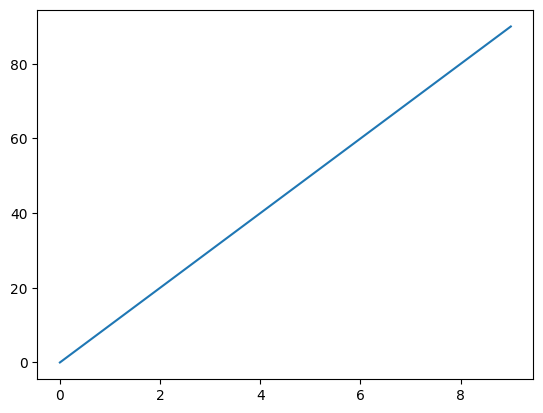

In [22]:
fig, ax = plt.subplots()
ax.plot(np.arange(10), np.arange(0, 100, 10))


In [23]:
def define_model(model, params):
    model = model(**params)
    return model

In [46]:
params = {
    "class_weight": [None, (0.2, 0.8)],
    "max_depth": [3, 5],
    "n_estimators": [50, 100],
    "max_features": [10, 20, 30],
}
# rf = define_model(RandomForestClassifier, params)

In [42]:
cw = params.popitem()

cw

('max_features', [10, 20, 30])

In [43]:
params

{'class_weight': None, 'max_depth': 5, 'n_estimators': 100}

In [25]:
rf = 

RandomForestClassifier(max_depth=3, max_features=20)

In [228]:
import tqdm

In [230]:
class GridSearch:
    def __init__(self, model, params_grid, scoring, top_n=3):
        self.model = model
        self._params_grid = self._get_param_combination(params_grid)
        self._scoring = scoring
        self._top_n = top_n
        self._all_params = {}
        self._best_params = {}
        self._best_score = np.inf
        self.best_estimator = None

    def fit(self, X, y):
        print(f"Training {len(self._params_grid)} cobinations")
        for param in tqdm.tqdm(self._params_grid):
            model = self._set_params(param)
            model.fit(X, y)
            preds = model.predict(X)
            metric = self._get_metric(y, preds)
            self._all_params[metric] = param
            if metric > self._best_score:
                self.best_estimator = model
                self._best_params = param
        self._sort_top_params()

    def _get_param_combination(self,params):
        keys = list(params.keys())
        combinations = list(product(*params.values()))
        c = [dict((k,v) for k,v in zip(keys,values)) for values in combinations]
        return c

    def _set_params(self, params):
        return self.model(**params)
    
    def _get_metric(self, y_true, y_pred):
        if self._scoring == "accuracy":
            return accuracy_score(y_true, y_pred)
        elif self._scoring == "precision":
            return precision_score(y_true, y_pred)
        elif self._scoring == "recall":
            return accuracy_score(y_true, y_pred)
        elif self._scoring == "roc_auc":
            return roc_auc_score(y_true, y_pred)
        
    def _sort_top_params(self):
        top_n = np.sort(list(self._all_params.keys()))[-self._top_n:]
        for key in self._all_params.keys():
            if key not in top_n:
                del self._all_params[key]

In [182]:
params

{'max_depth': [3, 5], 'n_estimators': [50, 100]}

In [192]:
rf_grid = GridSearch(RandomForestClassifier(random_state=2017), params, "accuracy")

In [176]:
rf = rf_grid.set_params(params)

In [180]:
np.arange(100).reshape(10, 10)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [197]:
params.update({"random_state":2024})

In [198]:
params

{'max_depth': [3, 5], 'n_estimators': [50, 100], 'random_state': 2024}

In [193]:
rf_grid.fit(np.arange(100).reshape(10, 10), np.random.randint(0,2, 10))

Training 4 cobinations


TypeError: 'RandomForestClassifier' object is not callable

In [31]:
rf2 = rf_grid.set_params(params)

In [32]:
rf2

RandomForestClassifier(max_depth=5, max_features=10)

In [113]:
def get_param_and_predict(X, y, params, param={}):
    while params != {}:
        key_values = params.popitem()
        for value_ in key_values[1]:
            param[key_values[0]] = value_
            get_param_and_predict(X, y, params, param)
    
    print(param)


In [165]:
params = {
    "max_depth": [3, 5],
    "n_estimators": [50, 100],
}
# get_param_and_predict(np.arange(10), np.arange(10), params)

In [54]:
len(params)

2

In [115]:
params = {
    "max_depth": [3, 5],
    "n_estimators": [50, 100],
}
passed = False
p = {}
if not passed:
    key_1 = params.popitem()
print(key_1[0], len(key_1[1]))
passed = True
passed2 = False
for  v in key_1[1]:
    p[key_1[0]] = v 
    if not passed2:
        key_2 = params.popitem()
    print(key_2[0], len(key_2[1]))
    passed2 = True
    for v2 in key_2[1]:
        p[key_2[0]] = v2
        print(p)

n_estimators 2
max_depth 2
{'n_estimators': 50, 'max_depth': 3}
{'n_estimators': 50, 'max_depth': 5}
max_depth 2
{'n_estimators': 100, 'max_depth': 3}
{'n_estimators': 100, 'max_depth': 5}


In [199]:
params = {
    "max_depth": [3, 5],
    "n_estimators": [50, 100],
    # "n_trees": [100, 200]
}
# set_p(params)

In [140]:
from itertools import product
combinat = product(*params.values())

In [160]:
keys = list(params.keys())
values = list(product(*params.values()))
c = [dict((k,v) for k,v in zip(keys,j)) for j in values]

In [171]:
np.sort(np.arange(10))

TypeError: sort() got an unexpected keyword argument 'descending'

In [231]:
class_weight = {0: 0.7,
                 1: 0.3}

params_list = {
        "LogisticRegression": {
            "class_weight": [None, class_weight],
            "C": np.linspace(0.001, 1, 11),
        },
        "DecisionTreeClassifier": {
            "class_weight": [None, class_weight],
            "max_depth": np.arange(1, 10),
            "max_features": list(map(round, np.linspace(10, 200, 10))),
        },
        "RandomForestClassifier": {
            "class_weight": [None, class_weight],
            "max_depth": np.arange(1, 10),
            "n_estimators": np.arange(20, 200, 20),
            "max_features": list(map(round, np.linspace(10, 200, 10))),
        },
        "AdaBoostClassifier": {
            "class_weight": [None, class_weight],
            "max_depth": np.arange(1, 10),
            "n_estimators": np.arange(20, 200, 50),
            "learning_rate": np.linspace(0.001, 1, 11),
        },
        "XGBClassifier": {
            "class_weight": [None, class_weight],
            "max_depth": np.arange(1, 10),
            "n_estimators": np.arange(100, 1000, 100),
            "learning_rate": np.linspace(0.001, 1, 11),
        },
        "MLPClassifier": {
            "class_weight": [None, class_weight],
            "alpha": np.linspace(0.0001, 1, 10), 
            "batch_size": [16, 32, 64, 128], 
            "learning_rate_init": np.linspace(0.001, 0.1, 5),
            "max_iter": np.arange(100, 500, 100),
        },
        "GaussianNB": {
            "class_weight": [None, class_weight],
            "var_smoothing": np.linspace(1e-10, 1, 10)   
        }
        }
SEED = 12
model = [(LogisticRegression,  {"random_state":SEED}),
        (DecisionTreeClassifier, {"random_state":SEED}),
        (RandomForestClassifier, {"random_state":SEED})]
        
for i in model:
    # name = i[0]
    # print(str(name))
    grid = GridSearch(i[0], params_list[name], "accuracy")
    grid.fit(np.arange(100).reshape(10, 10), np.random.randint(0,2, 10))

Training 22 cobinations


100%|██████████| 22/22 [00:00<00:00, 77.46it/s]


Training 22 cobinations


  0%|          | 0/22 [00:00<?, ?it/s]


TypeError: DecisionTreeClassifier.__init__() got an unexpected keyword argument 'C'

In [232]:
model = [(LogisticRegression, {"random_state"}),  
        (DecisionTreeClassifier, {"random_state"}),
        (RandomForestClassifier, {"random_state"})]
        
for i in model:
    name = str(i[0]).split(".")[-1].split("'")[0]
    print(name)
    grid = GridSearch(i[0], params_list[name], "accuracy")
    grid.fit(np.arange(100).reshape(10, 10), np.random.randint(0,2, 10))

LogisticRegression
Training 22 cobinations


100%|██████████| 22/22 [00:00<00:00, 77.40it/s]


DecisionTreeClassifier
Training 180 cobinations


100%|██████████| 180/180 [00:01<00:00, 175.93it/s]


RuntimeError: dictionary changed size during iteration